In [23]:
#Projekt Titanik - David Blazheski

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import shap
import os
for dirname, _, filenames in os.walk('projekt'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
# Display the first 10 rows of the train dataset
print(train.head(10))
print(train.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [26]:
# See which columns have missing values
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
# Write a function that will preprocess the data, delete unnecessary columns, fill in missing values, and encode categorical variables
def preprocessing(train , test):
    train = pd.concat([train, test])
    train = train.drop('PassengerId' , axis=1)
    train = train.drop('Ticket' , axis=1)
    train = train.drop('Name' , axis=1)
    train = train.drop('Cabin' , axis=1)
    train['Age'] =  train['Age'].fillna(train['Age'].mean())
    train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
    train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
    train = pd.get_dummies(train , columns = ['Sex','Embarked'] )
    
    train1 = train.iloc[:-len(test)]
    test1 = train.iloc[-len(test):]

    return train1 , test1

In [28]:
train1 , test1 = preprocessing(train, test)
print(train1.isna().sum())
print(train1.info())


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 53.1 KB
None


C:\Users\Acer\AppData\Local\Temp\ipykernel_22624\1180453769.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [29]:
print(train1.head(10))  

   Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0       0.0       3  22.000000      1      0   7.2500       False      True   
1       1.0       1  38.000000      1      0  71.2833        True     False   
2       1.0       3  26.000000      0      0   7.9250        True     False   
3       1.0       1  35.000000      1      0  53.1000        True     False   
4       0.0       3  35.000000      0      0   8.0500       False      True   
5       0.0       3  29.881138      0      0   8.4583       False      True   
6       0.0       1  54.000000      0      0  51.8625       False      True   
7       0.0       3   2.000000      3      1  21.0750       False      True   
8       1.0       3  27.000000      0      2  11.1333        True     False   
9       1.0       2  14.000000      1      0  30.0708        True     False   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       Fa

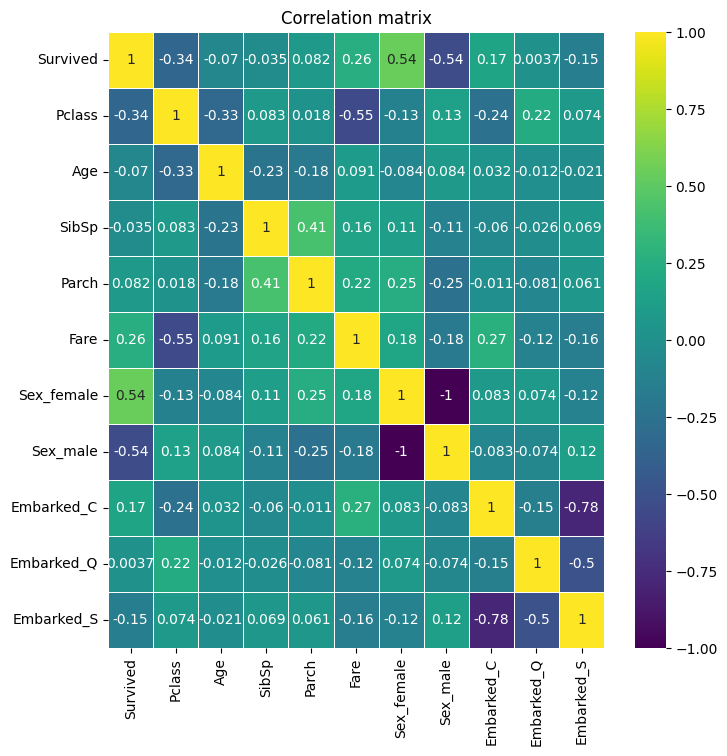

In [30]:
# Play with the data and see how the data is distributed
correlation_matrix = train1.corr()
plt.figure(figsize=(8, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

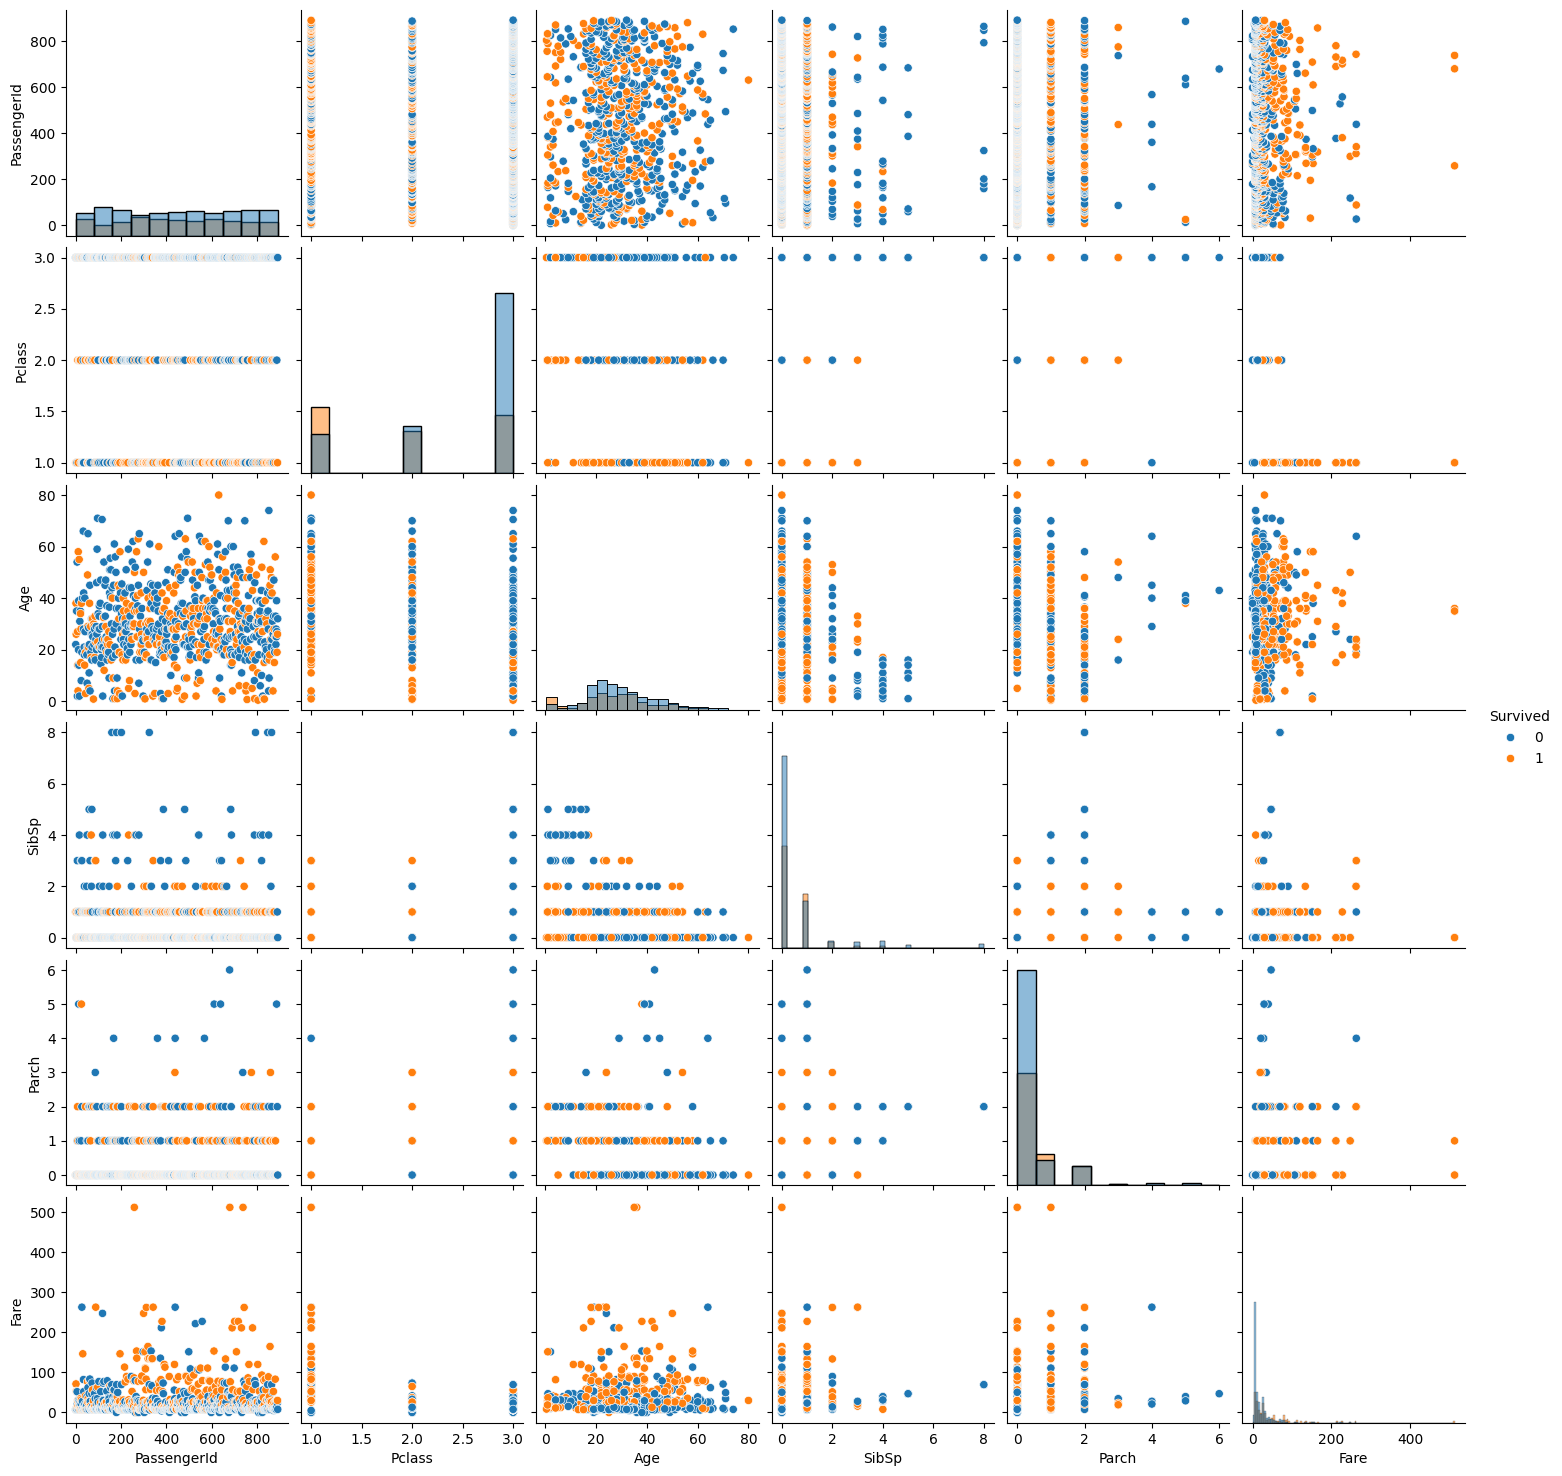

In [31]:
sns.pairplot(train, hue="Survived", diag_kind="hist")

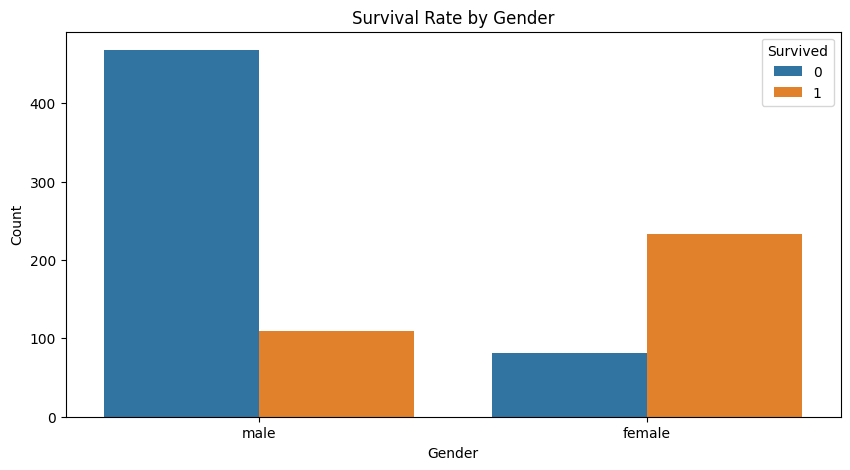

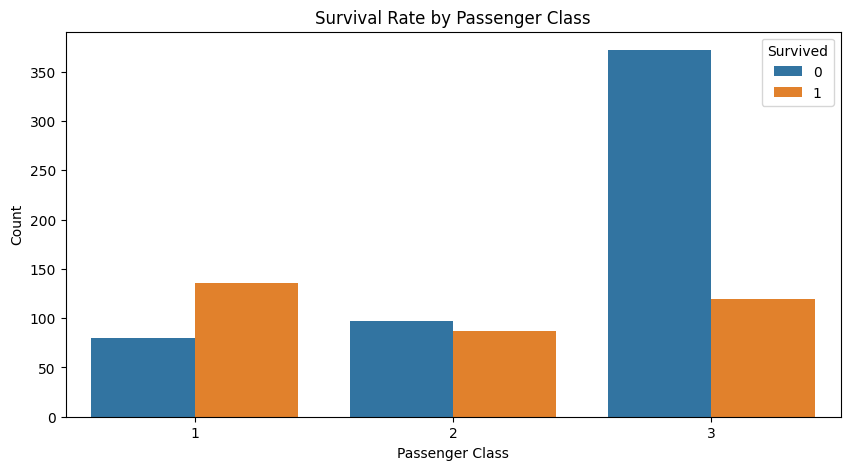

In [32]:
# Plot 1: Survival Rate by Gender
plt.figure(figsize=(10, 5))  # Adjust figure size for better readability
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Plot 2: Survival Rate by Passenger Class
plt.figure(figsize=(10, 5))  # Adjust figure size for better readability
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

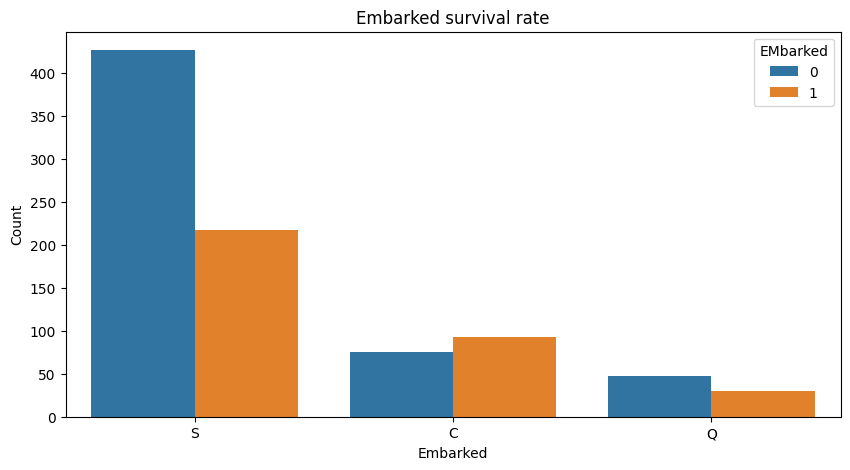

In [33]:
survived_S = len(train[(train['Embarked'] == 'S') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'S'])*100
survived_C = len(train[(train['Embarked'] == 'C') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'C'])*100
survived_Q = len(train[(train['Embarked'] == 'Q') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'Q'])*100
S = [survived_S,100-survived_S]
C = [survived_C,100-survived_C]
Q = [survived_Q,100-survived_Q]
# Plot 1: 
plt.figure(figsize=(10, 5))  
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Embarked survival rate')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='EMbarked', loc='upper right')
plt.show()


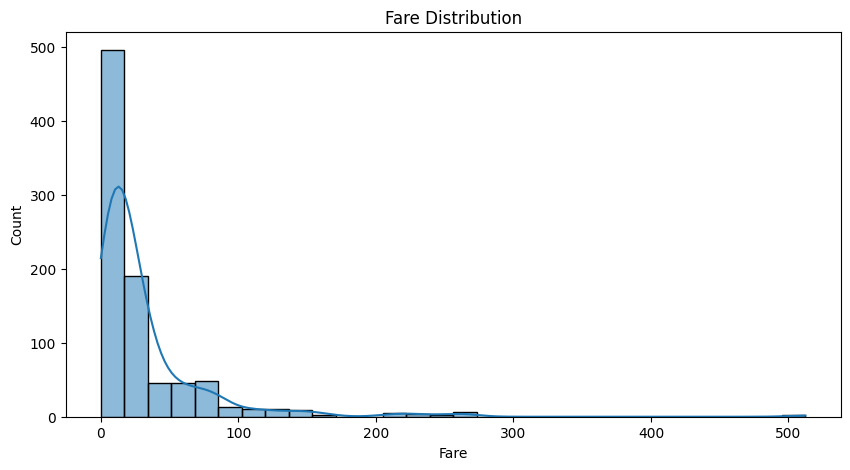

In [34]:
#Distribution of fare
plt.figure(figsize=(10, 5))
sns.histplot(train['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

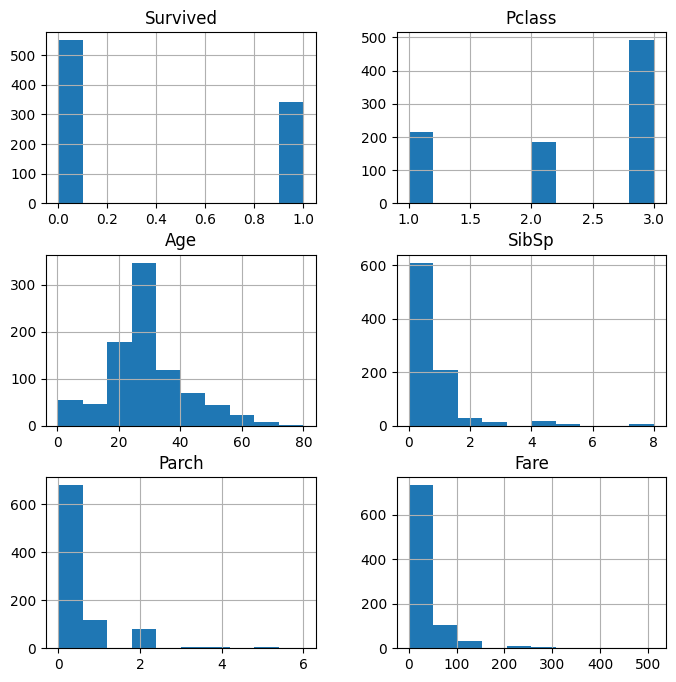

In [35]:
p = train1.hist(figsize = (8,8))

In [36]:
'''FEMALE PASSENGERS WERE SAVED MORE THAN MALE PASSENGERS
CLASS 1, CLASS 2, CLASS 3 WAS ALSO CONSIDERED WHILE SAVING THE PASSENGERS
NO SUCH PREFERENCE CAN BE SAID ABOUT THE PASSENGERS BASED ON PORT OF EMBARKATION
'Parch' & 'SibSp' DON'T GIVE US MUCH ABOUT THE DATA 
DISTRIBUTION OF 'FARE' SHOWS PREFERENCE GIVEN TO PEOPLE HAVING PAID MORE FOR FARE THAN OTHERS
PROBABLY BECAUSE OF CLASS 1, CLASS 2, CLASS 3'''
    

"FEMALE PASSENGERS WERE SAVED MORE THAN MALE PASSENGERS\nCLASS 1, CLASS 2, CLASS 3 WAS ALSO CONSIDERED WHILE SAVING THE PASSENGERS\nNO SUCH PREFERENCE CAN BE SAID ABOUT THE PASSENGERS BASED ON PORT OF EMBARKATION\n'Parch' & 'SibSp' DON'T GIVE US MUCH ABOUT THE DATA \nDISTRIBUTION OF 'FARE' SHOWS PREFERENCE GIVEN TO PEOPLE HAVING PAID MORE FOR FARE THAN OTHERS\nPROBABLY BECAUSE OF CLASS 1, CLASS 2, CLASS 3"

In [37]:
X = train1.drop('Survived' , axis=1).values
y = train1['Survived'].values

te = test1.drop('Survived' , axis=1).values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 30)

from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=12)  

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
knn_preds = knn_model.predict(X_test_scaled)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))



KNN Accuracy: 0.8268156424581006
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       108
         1.0       0.87      0.66      0.75        71

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

KNN Confusion Matrix:
 [[101   7]
 [ 24  47]]


In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
log_reg_preds = log_reg_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))


Logistic Regression Accuracy: 0.7821229050279329
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       108
         1.0       0.76      0.66      0.71        71

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Logistic Regression Confusion Matrix:
 [[93 15]
 [24 47]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=30)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))



Random Forest Accuracy: 0.8044692737430168
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       108
         1.0       0.79      0.69      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Random Forest Confusion Matrix:
 [[95 13]
 [22 49]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selected features
features = ['Pclass', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

# Prepare the feature matrix
X= train1[features].values
y = train1['Survived'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=13)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_preds = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))





KNN Accuracy: 0.7597765363128491
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       105
         1.0       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

KNN Confusion Matrix:
 [[87 18]
 [25 49]]


In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
log_reg_preds = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))

Logistic Regression Accuracy: 0.7653631284916201
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       105
         1.0       0.70      0.77      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179

Logistic Regression Confusion Matrix:
 [[80 25]
 [17 57]]


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


Random Forest Accuracy: 0.8044692737430168
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       105
         1.0       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

Random Forest Confusion Matrix:
 [[96  9]
 [26 48]]
